# Import all libraries

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point

# Look at data

In [6]:
os.chdir(r'C:\Users\daphn\Documents')

In [11]:
population_data = pd.read_csv('sc-est2016-agesex-civ.csv')
population_data.head()


,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,10,0,0,0,United States,0,0,3944160,3951400,3963239,3926677,3931346,3955374,3975414,3970145
1,10,0,0,0,United States,0,1,3978090,3957847,3966617,3978101,3943114,3950083,3974980,3995008
2,10,0,0,0,United States,0,2,4096939,4090856,3971363,3980016,3992752,3959663,3967361,3992154
3,10,0,0,0,United States,0,3,4119051,4111929,4102483,3982920,3992660,4006960,3974468,3982074
4,10,0,0,0,United States,0,4,4063186,4077557,4122286,4112795,3994261,4005464,4020276,3987656


In [14]:
print(population_data.info())
population_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13572 entries, 0 to 13571
Data columns (total 15 columns):
SUMLEV             13572 non-null int64
REGION             13572 non-null int64
DIVISION           13572 non-null int64
STATE              13572 non-null int64
NAME               13572 non-null object
SEX                13572 non-null int64
AGE                13572 non-null int64
ESTBASE2010_CIV    13572 non-null int64
POPEST2010_CIV     13572 non-null int64
POPEST2011_CIV     13572 non-null int64
POPEST2012_CIV     13572 non-null int64
POPEST2013_CIV     13572 non-null int64
POPEST2014_CIV     13572 non-null int64
POPEST2015_CIV     13572 non-null int64
POPEST2016_CIV     13572 non-null int64
dtypes: int64(14), object(1)
memory usage: 1.6+ MB
None


,SUMLEV,REGION,DIVISION,STATE,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
count,13572.000000,13572.000000,13572.000000,13572.000000,13572.000000,13572.000000,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04,1.357200e+04
mean,39.423077,2.615385,5.019231,28.403846,1.000000,53.494253,1.812720e+05,1.816168e+05,1.829919e+05,1.843550e+05,1.856542e+05,1.870542e+05,1.884469e+05,1.897584e+05
std,4.120207,1.094675,2.583254,16.027322,0.816527,104.905228,3.319803e+06,3.326130e+06,3.351447e+06,3.376513e+06,3.400418e+06,3.426215e+06,3.451867e+06,3.475960e+06
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.880000e+02,3.850000e+02,3.810000e+02,4.420000e+02,4.700000e+02,5.010000e+02,4.760000e+02,4.510000e+02
25%,40.000000,2.000000,3.000000,15.750000,0.000000,21.000000,1.093475e+04,1.098325e+04,1.105325e+04,1.115300e+04,1.126175e+04,1.133250e+04,1.142550e+04,1.154975e+04
50%,40.000000,3.000000,5.000000,28.500000,1.000000,43.000000,2.840700e+04,2.851350e+04,2.878300e+04,2.898250e+04,2.926100e+04,2.960750e+04,2.990900e+04,3.019500e+04
75%,40.000000,3.250000,7.250000,41.250000,2.000000,65.000000,6.280000e+04,6.279425e+04,6.345125e+04,6.378450e+04,6.404900e+04,6.449050e+04,6.482125e+04,6.530450e+04
max,40.000000,4.000000,9.000000,56.000000,2.000000,999.000000,3.075280e+08,3.081130e+08,3.104457e+08,3.127583e+08,3.149623e+08,3.173375e+08,3.197001e+08,3.219251e+08


# Filter out general population and sum per USA state

In [16]:
population_data_all = population_data[population_data['SEX']==0]
population_data_all = population_data_all[population_data_all['AGE']!=999]
population_sums = population_data_all.groupby(by=['NAME'], as_index=False)[['POPEST2010_CIV','POPEST2011_CIV','POPEST2012_CIV',
                                              'POPEST2013_CIV','POPEST2014_CIV','POPEST2015_CIV','POPEST2016_CIV']].sum()
population_sums.head()

,NAME,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV
0,Alabama,4769452,4784435,4800307,4814150,4828303,4840221,4849650
1,Alaska,691795,703665,710107,713284,714590,715690,720195
2,Arizona,6386391,6445831,6529632,6604092,6700353,6799510,6911889
3,Arkansas,2914830,2932921,2944129,2951923,2960138,2972327,2982997
4,California,37181550,37523842,37858037,38179112,38527672,38838074,39091453


# Create map of the USA

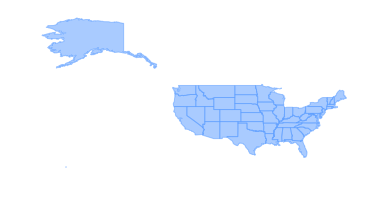

In [21]:
S_DIR = 'US_shape/' 
BLUE = '#5599ff'

with open('states.json') as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()
for feature in data['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

# Play - resize Alaska

MultiPolygon


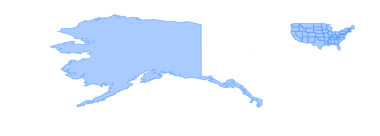

In [22]:
fig = plt.figure() 
ax = fig.gca()
tmp = None
co = None
for feature in data['features']:
    STATE_NAME = feature['properties']['STATE_NAME']
    alaska = False
    if (STATE_NAME=='Alaska'):
        alaska = True
    geometry = feature['geometry']
    if(alaska==True):
        print(geometry['type'])
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            #Each polygon is a list of points giving the outline of the shape
            #Each point is an [x,y] pair
            #So to shift the shape we simply add/subtract to the numbers
            #To scale the shape we multiply/divide the numbers
            if (alaska):
                for pair in polygon:
                    pair[0] = pair[0]+100
                    pair[1] = pair[1]-60
                    pair[0] = pair[0]*5
                    pair[1] = pair[1]*5
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

# 2016 data

In [23]:
just2016 = population_data_all[['NAME','AGE','POPEST2016_CIV']]
just2016.head()

,NAME,AGE,POPEST2016_CIV
0,United States,0,3970145
1,United States,1,3995008
2,United States,2,3992154
3,United States,3,3982074
4,United States,4,3987656


In [25]:
#Remove an unneccessary copy warning 
pd.options.mode.chained_assignment = None 

#### Compute average age per state

In [26]:
just2016['SUMS']  = just2016['AGE']*just2016['POPEST2016_CIV']
avg_age_calc = just2016.groupby(by=['NAME'], as_index=False).sum()
avg_age_calc['AVERAGE_AGE'] = avg_age_calc['SUMS'] / avg_age_calc['POPEST2016_CIV']
avg_age_calc = avg_age_calc[['NAME','AVERAGE_AGE']]
avg_age_calc.head()

,NAME,AVERAGE_AGE
0,Alabama,38.975781
1,Alaska,35.559922
2,Arizona,38.507104
3,Arkansas,38.535537
4,California,37.405932


In [27]:
# Find min/max
max_avg = avg_age_calc['AVERAGE_AGE'].max()
min_avg = avg_age_calc['AVERAGE_AGE'].min()

# Show color map of average age

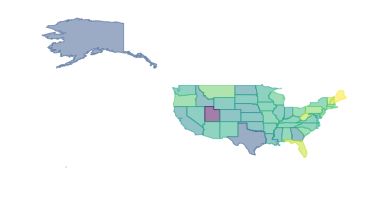

In [30]:
BLUE = '#5599ff'

with open('states.json') as rf:    
    data = json.load(rf)

fig = plt.figure() 
ax = fig.gca()
for feature in data['features']:
    geometry = feature['geometry']
    NAME = feature['properties']['STATE_NAME']
    POP = avg_age_calc.loc[avg_age_calc['NAME'] == NAME, 'AVERAGE_AGE'].iloc[0]
    cmap = plt.cm.viridis
    norm = matplotlib.colors.Normalize(vmin=min_avg, vmax=max_avg)
    col = cmap(norm(POP))
    #print(NAME,POP,col)
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=col, ec=col,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=col, ec=col, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

# Same but with geopandas gdal

In [32]:
just2016 = population_data_all[['NAME','AGE','POPEST2016_CIV']]
just2016['population_sum'] = just2016['AGE'] * just2016['POPEST2016_CIV']
stats2016_per_state = just2016.groupby(by='NAME', as_index=False).sum()
stats2016_per_state['avg_age'] = stats2016_per_state['population_sum'] / stats2016_per_state['POPEST2016_CIV']
stats2016_per_state.head()

,NAME,AGE,POPEST2016_CIV,population_sum,avg_age
0,Alabama,3655,4849650,189018898,38.975781
1,Alaska,3655,720195,25610078,35.559922
2,Arizona,3655,6911889,266156830,38.507104
3,Arkansas,3655,2982997,114951390,38.535537
4,California,3655,39091453,1462252252,37.405932


In [3]:

import geopandas as gpd

ImportError: DLL load failed: The specified module could not be found.

In [37]:
states = gpd.read_file('US_shape/states.shp')
states_data = states.merge(stats2016_per_state, left_on = 'STATE_NAME', right_on = 'NAME')
states_data.head()

NameError: name 'gpd' is not defined

In [38]:
states_data.plot(column = 'avg_age')

NameError: name 'states_data' is not defined